# Проект "Фитнес"

## Описание проекта

### Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
  - 1) выделить целевые группы клиентов;
  - 2) предложить меры по снижению оттока;
  - 3) определить другие особенности взаимодействия с клиентами.
  
## Порядок выполнения проекта:

### Шаг 1. Загрузка данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
- `'Churn'` — факт оттока в текущем месяце;

- Текущие поля в датасете:
  - Данные пользователя за предыдущий до проверки факта оттока месяц:
    - `'gender'` — пол
    - `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр
    - `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
    - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
    - `'Phone'` — наличие контактного телефона
    - `'Age'` — возраст
    - `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах)
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
  - `'Contract_period'` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
  - `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах)
  - `'Group_visits'` — факт посещения групповых занятий
  - `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента
  - `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц
  - `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
  
### Шаг 2. Исследовательский анализ данных (EDA)

- Посмотр датасета: есть ли в нем отсутствующие признаки, какие средние значения и стандартные отклонения;
- Посмотр средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
- Построение столбчатых гистограмм и распределений признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Построение матрицы корреляций.

### Шаг 3. Построение модели прогнозирования оттока пользователей

Построение модели бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.

### Шаг 4. Кластеризация пользователей

### Шаг 5. Общие выводы и рекомендации по работе с клиентами

## Шаг 1. Загрузка данных

In [31]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
# Загрузка данных
df = pd.read_csv('/datasets/gym_churn.csv')

In [33]:
# Посмотрим на датасет
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Шаг 2. Исследовательский анализ данных (EDA)

Для начала посмотрим общую информацию о датасете

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [35]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


К счастью, нет никаких отстутствующих значений. В датасете 4000 строк. Средние значения и стандартные показатели говорят нам о том, что данные не стандартизированны. 

По показателям, представленным булевыми занчениями можно сразу определить, какую часть единичные значения составляют от всех значений (по значению среднего). Поэтому можно сразу определить, что в столбце `Churn` на факт оттока указывает значение равное 1, так как их всего 26,5% среди представленных данных(было бы странно, если наоборот).

Посмотрим на средние значения признаков в двух группах:

In [36]:
df.groupby(by = 'Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Если сравнивать средние значения, то сразу видна разница: среди ушедших в отток часть проживающих или работающих в районе, где находится фитнес-центр меньше, также меньше относительное количество сотрудников компании-партнёра клуба и пришедших в рамках акции "приведи друга". В целом, все средние значения признаков меньше у ушедших в отток. Исключения составляют показатели `gender` и `Phone`. Данные показатели скорее всего мало влиют на отток и это логично.

Построим столбчатые диаграмми и посмотрим на распределения признаков

In [37]:
# Сформируем список признаков
features = df.columns
features = features.to_list()
features.remove('Churn')
features

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month']

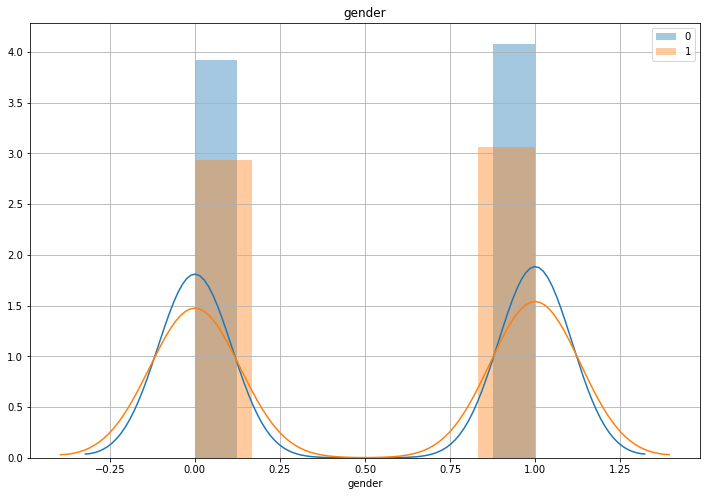

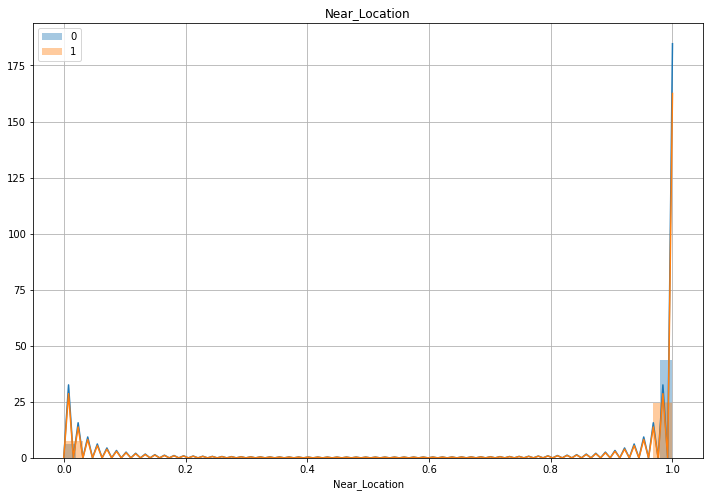

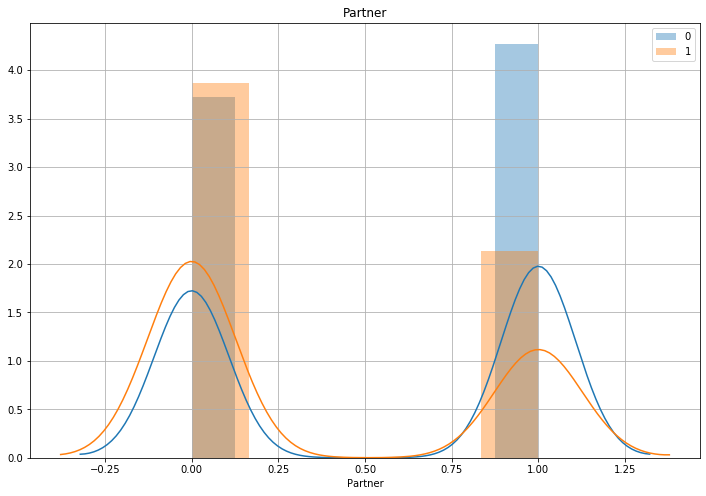

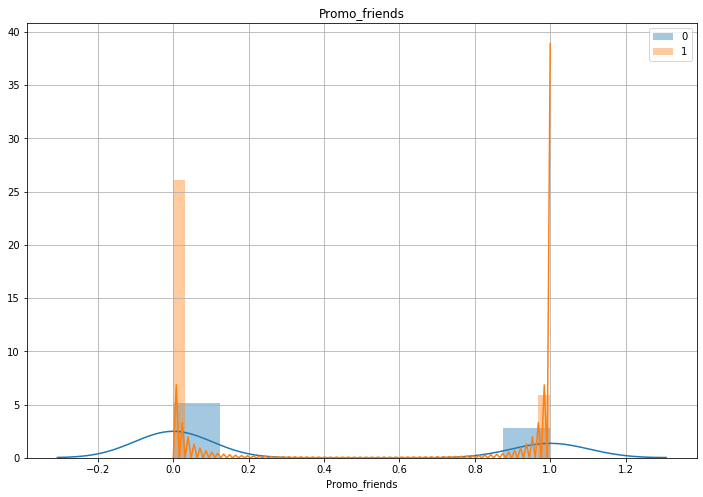

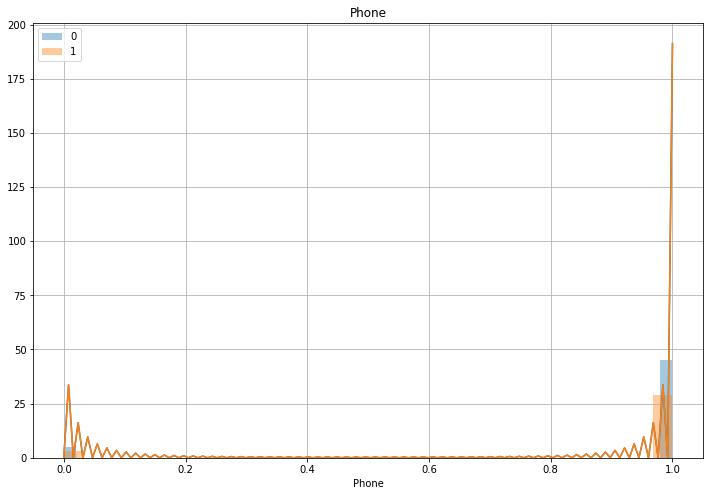

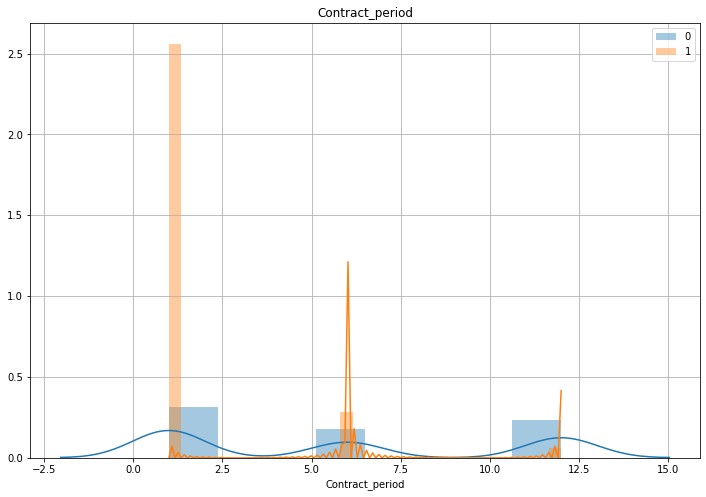

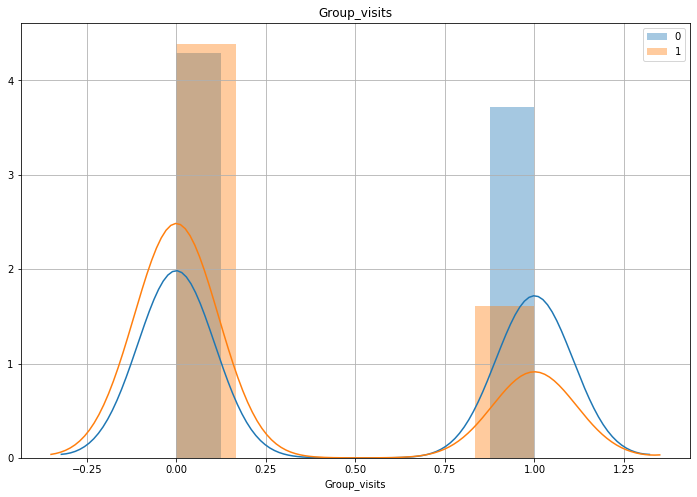

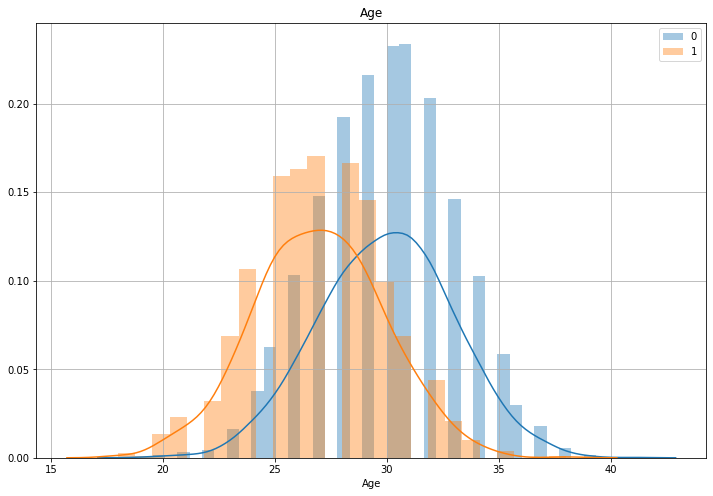

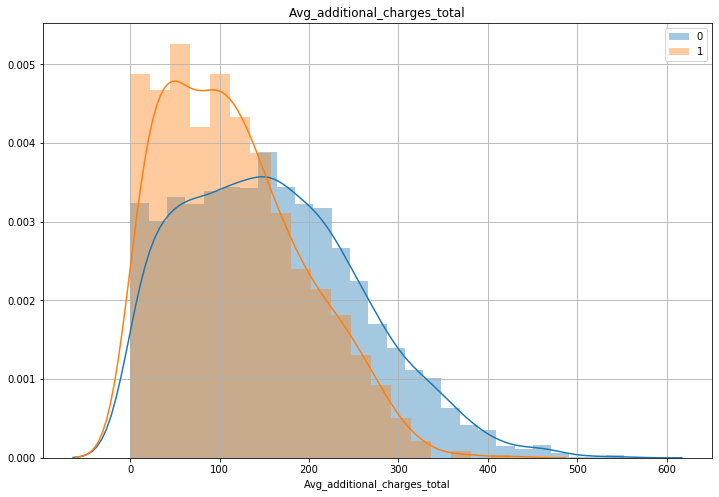

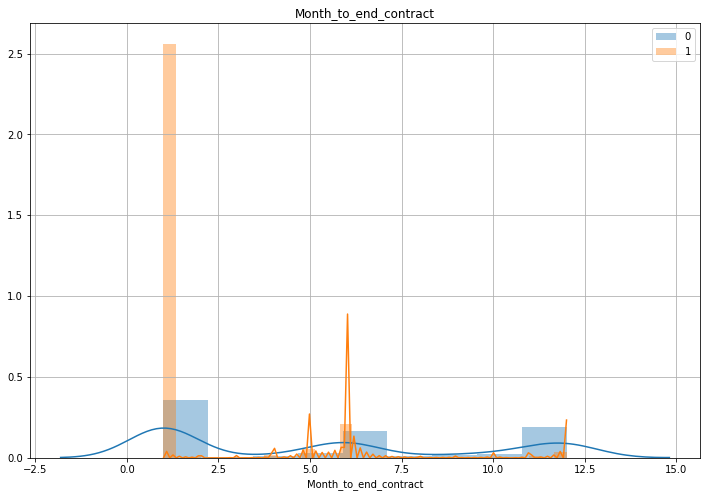

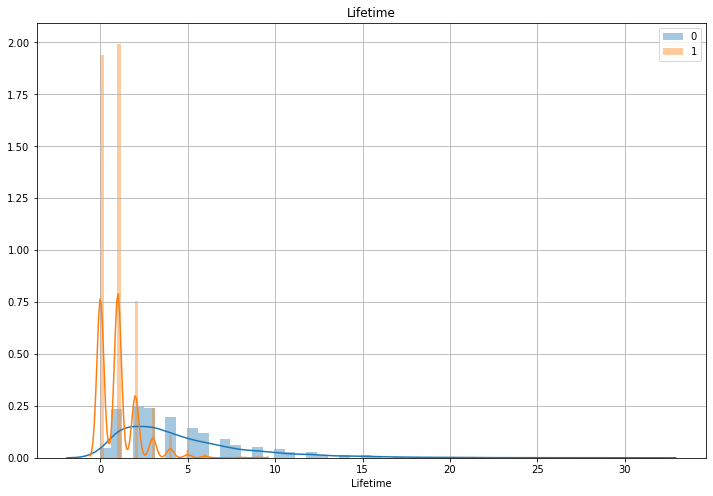

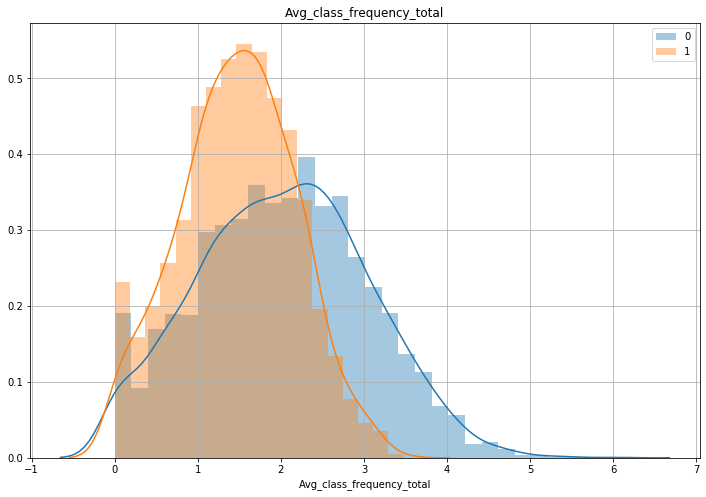

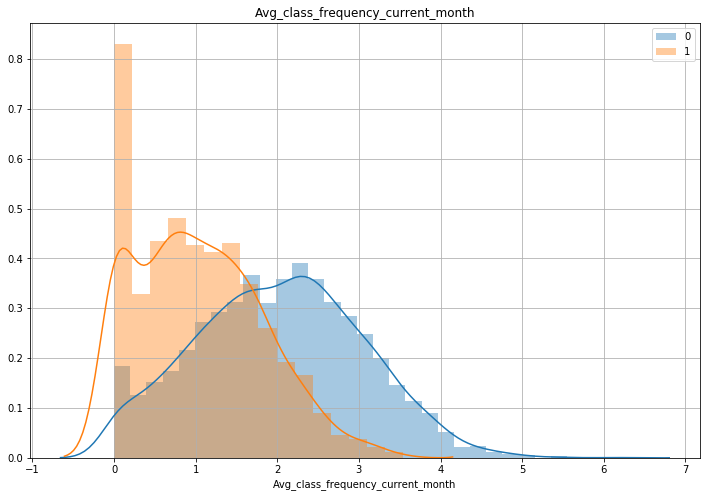

In [38]:
for feature in features:
    '''
    Цикл для построения диаграм для каждого признака
    '''
    plt.figure(figsize = (12,8))
    sns.distplot(df[df['Churn'] == 0][feature], label = '0')
    sns.distplot(df[df['Churn'] == 1][feature], label = '1')
    plt.title(feature)
    plt.legend()
    plt.grid()
    plt.show()

Тезисно сформулирую выводы по каждому графику:

- `gender` - факт оттока никак не зависит от пола. Практически одинаковые значения.
- `Near_Location` - бОльшая часть клиентов живут или работают неподалеку. Среди них клиентов уходящих в отток заметно меньше, нежели постоянных.
- `Partner` - среди тех, кто является сотрудником компании-партнёра клуба тех, кто уходит в отток гораздо меньше не уходящих.
- `Promo_friends` - большое количество уходящих не использовали промокод  в рамках акции «приведи друга».
- `Phone` - наличие контактного телефона мало влияет на отточность. Соотношение постоянные/отточные между клиентами с привязкой и без мало отличается. Да и лично для меня анный признак малопоказателен.
- `Contract_period` - большое количество уходящих в отток брали абонемент с минимальной длительностью - 1 месяц.
- `Group_visits` - посещающие групповые занятия намного реже уходят в отток.
- `Age` - средний возраст уходящих несколько ниже постоянных клиентов.
- `Avg_additional_charges_total` - в общем средняя выручка постоянных клиентов больше отточных.
- `Month_to_end_contract` - по данному графику видно, что чем ближе окончание абонемента, тем больше вероятность того, что клиент уйдёт в отток не покупая новый. Скорее всего, клиенты которые предрасположены к уходу в отток берут абонемент на короткое время.
- `Lifetime` - да, так и есть. Наиболее частое время жизни уходящих в отток - 1-2 месяца.
- `Avg_class_frequency_total` - сразу видно, что постоянные клиенты ходят чаще отточных.
- `Avg_class_frequency_current_mounth` - среднее количество посещений в неделю клиентов уходящих в отток за прошлый месяц заметно ниже среднего за весь период. У меня есть 2 версии: 
    1. За последний месяц в отток ушло намного больше клиентов, чем обычно. 
    2. Это нормальное явление, так как в последний месяц клиенты уходящие в отток постепенно перестают ходить в зал, то есть не используют абонемент до самого конца.

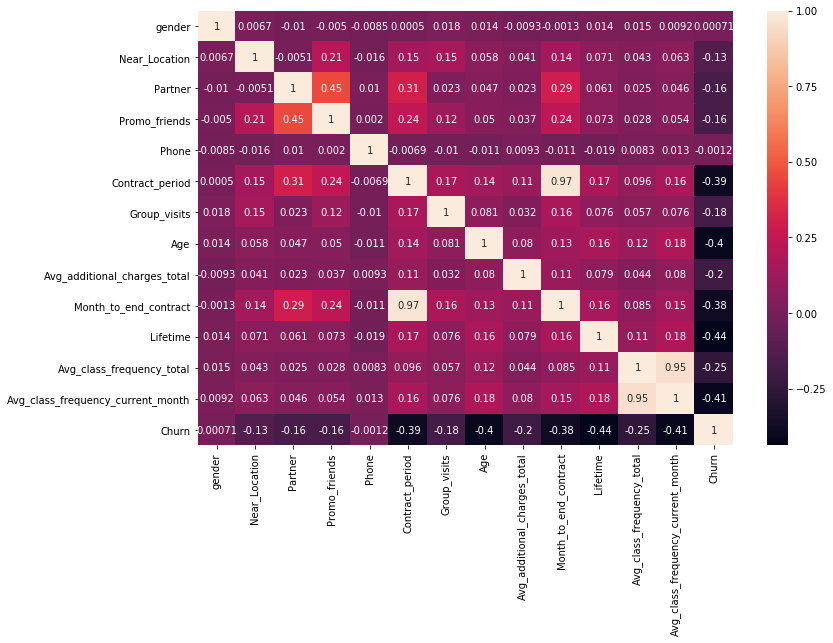

In [39]:
# Построим матрицу корреляций
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True);

Очень сильно кореллируют значения длительности текущего действующего абонемента и срок до его окончания(`Contract_period` и `Month_to_end_contract`), а также частоты посещений в неделю за последний месяц и за все время (`Avg_class_frequency_current_month` и `Avg_class_frequency_total` соответственно). Все логично.

**<font color="blue">UPD:</font>** Рассмотрим тщательнее коэффициенты корреляции признаков с `Churn`:

У нас прослеживаются **слабые корелляции** `Churn` с:
- `Contract_period` - отточность выше у клиентов с маленькой длительностью абонемента.
- `Age` - чем младше клиент, тем выше шанс того, что он уйдет в отток.
- `Month_to_end_contract` - чем меньше времени остаётся у клиента до окончания срока абонемента, тем больше шанс того, что он уйдёт в отток.
- `Lifetime` - чем дольше клиент занимается в зале, тем меньше вероятность того, что он уйдёт в отток.
- `Avg_class_frequency_current_month` - чем меньше клиент занимался в прошлом месяце, тем выше шанс того, что он уйдёт.

### **<font color="blue">Мой комментарий</font>**

Я вспомнил об этом под самый конец, и уже не стал этого делать, дабы избежать переделываний уже написанных выводов. Посмотрю, как сильно это на них повлияет.

In [40]:
df = df.drop(['Contract_period', 'Avg_class_frequency_total'], axis = 1)





## Шаг 3. Построение модели прогнозирования оттока пользователей

In [41]:
# Разделим данные на признаки и целевую переменную
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [42]:
# Разобъем данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
# После ознакомления с информацией от коллег со Slack добавил аргумент stratify = y 
# для исключения возможности попадания наблюдений одного класса лишь в одну выборку 

In [43]:
# Задаём алгоритм логистической регрессии
lr_model = LogisticRegression(random_state=0)

# Обучаем модель
lr_model.fit(X_train, y_train)

# Строим прогнозы по нашей модели
lr_predictions = lr_model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


По заданию требуется также взять вторую модель алгоритма случайного леса. Так как наша задача является задачей бинарной классификации, берем `RandomForestClassifier`

In [44]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# Обучаем модель
rf_model.fit(X_train, y_train)

# Прогноз
rf_predictions = rf_model.predict(X_test)

In [45]:
def get_required_metrics(predictions):
    '''
    Вывод метрик accuracy, precision и recall а основе значений прогнозов
    '''
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

In [46]:
# Получим значения метрик для модели логистической регрессии
get_required_metrics(lr_predictions)

Accuracy: 0.92
Precision: 0.85
Recall: 0.83


In [47]:
# Получим значения метрик для модели случайного леса
get_required_metrics(rf_predictions)

Accuracy: 0.91
Precision: 0.85
Recall: 0.80


#### Вывод

Видим, что модель логистической регрессии показывает себя лучше, если смотреть на значения метрик. Доля правильных ответов, точность и полнота модели случайного леса на 1-3% хуже соответствующих метрик модели логистической регрессии. 

## Шаг 4. Кластеризация пользователей

На данном шаге выделим целевые группы клиентов и рассмотрим их

Перед работой с алгоритмами требуется обязательно стандартизировать данные

In [48]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Далее нарисуем дендрограмму. Для этого нам сначала потребуется посторить матрицу расстояний. Воспользуемся функцией `linkage`

In [49]:
linked = linkage(X_sc, method = 'ward')

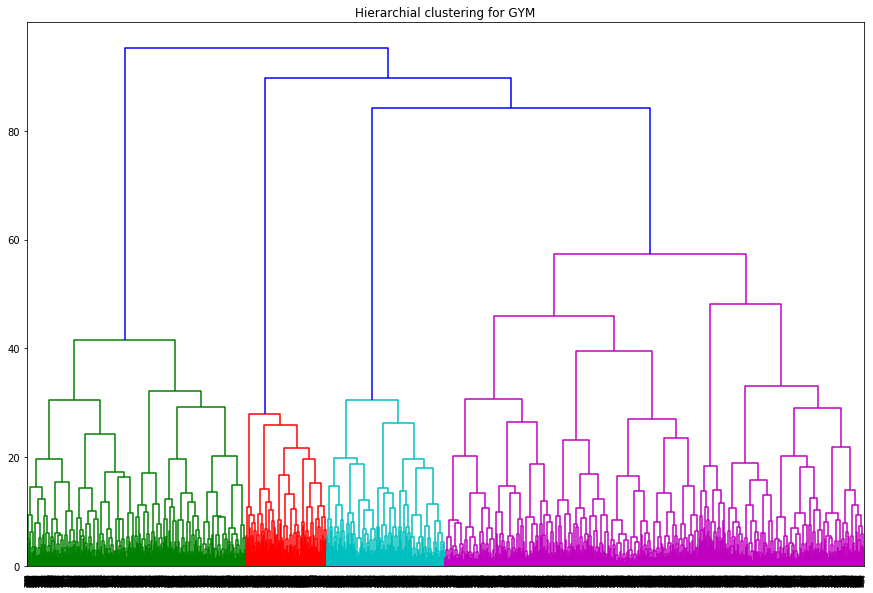

In [50]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Предложенное оптимальное число кластеров 4 - четыре разных цвета  на графике. 

Однако, по заданию требуется принять число кластеров равное 5. Обучим кластеризации на основании алгоритма K-Means и спрогнозируем эти пять кластеров клиентов.

In [51]:
# Задаем модель k_means с требуемым числом кластеров
km = KMeans(n_clusters = 5, random_state = 0)

# Прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [52]:
# Сохраним метки кластера в поле нашего датасета
df['cluster_label'] = labels

In [53]:
# Проверим правильность заполнения
df

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_current_month,Churn,cluster_label
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0,4
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0,2
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,33,2.406023,12.0,8,2.349070,0,1
3996,0,1,0,0,1,1,29,68.883764,1.0,1,0.292859,1,2
3997,1,1,1,1,1,0,28,78.250542,11.0,2,2.831439,0,0
3998,0,1,1,1,1,0,32,61.912657,5.0,3,1.596237,0,0


Кластеры определены. ПОсомтрим на средние значения признаков для них. Вдруг заметим что-то интересное

In [54]:
df.groupby(by = 'cluster_label').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_current_month,Churn
cluster_label,,,,,,,,,,,,
0,0.492000,0.994000,0.953000,1.000000,0.906000,0.528000,29.633000,154.086252,6.730000,4.287000,1.919105,0.108000
1,0.495352,0.998672,0.378486,0.046481,0.903054,0.000000,30.342629,174.392898,4.698539,5.166003,2.237272,0.046481
2,0.510507,1.000000,0.224969,0.114957,0.899876,0.187886,26.800989,111.061687,1.710754,1.422744,0.984420,0.740420
3,0.502455,0.000000,0.489362,0.072013,0.913257,0.232406,28.700491,137.375245,2.826514,3.027823,1.599583,0.400982
4,0.551391,0.998791,0.275695,0.074970,0.897219,1.000000,30.275695,155.484435,4.730351,4.499395,2.044372,0.089480


Кластер 0 вместил в себя самых лояльных клиентов: все признаки по значениям либо выше остальных, либо среди лидирующих кластеров. И по значению в столбце `churn` мы видим: наименьшее количество ушедших клиентов среди остальных кластеров.

Кластер 3 наоборот вместил в себя самых нелояльных: самые низкие значения выручки, времени жизни, частоте посещения. К "плохим" кластерам также отнёс бы кластер 2.

### **<font color="blue">Исправления</font>** 

После удаления сильнокореллирующих признаков ситуация несколько поменялась. Доля оттока у кластера 0 теперь 10,8%. Впереди кластер 2 с 4,6% и кластер 5 с 8,9%.

Кластер 0 теперь в моих глазах представляется группой работяг-друзей, работающих неподалёку и являющимися сотрудниками компании- партнёра зала. По всей видимости, после работы часто ходят позаниматься. Ну или чисто в сауну :D

Кластер 2 и 3 поменялись позициями, но всё также считаются самыми хужшими по показателю оттока.

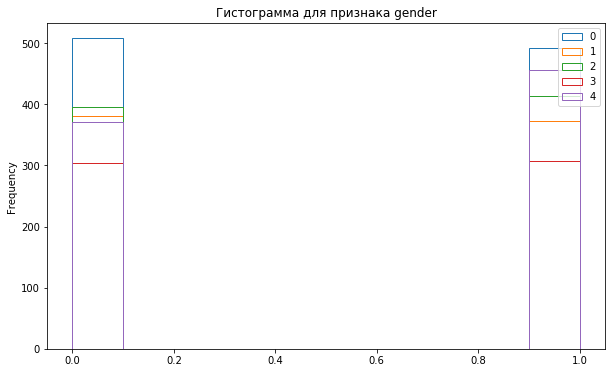

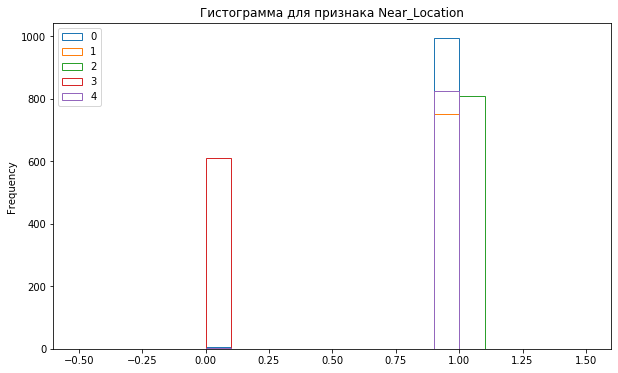

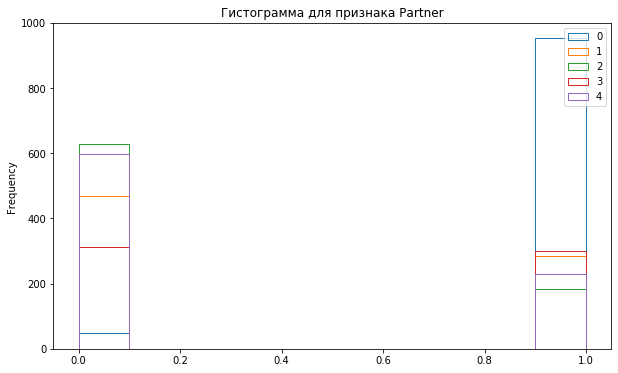

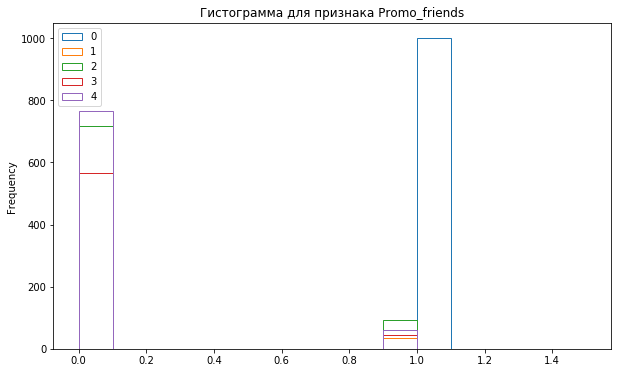

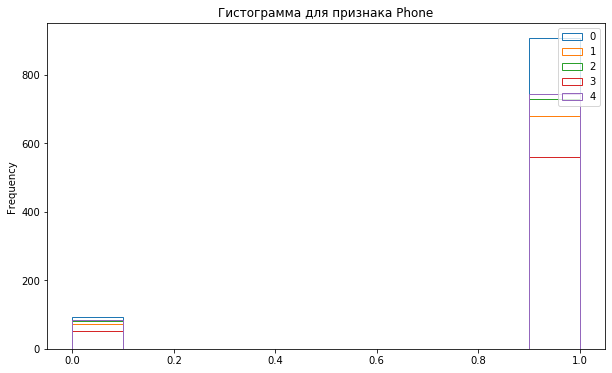

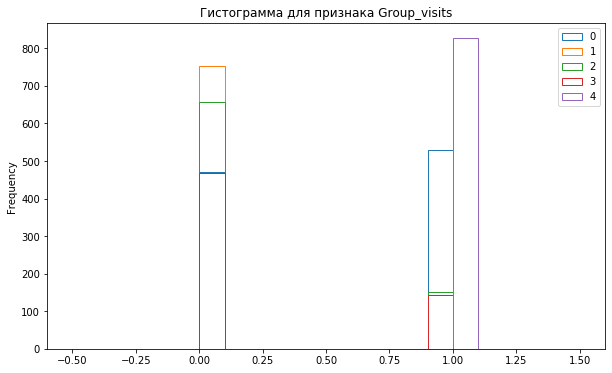

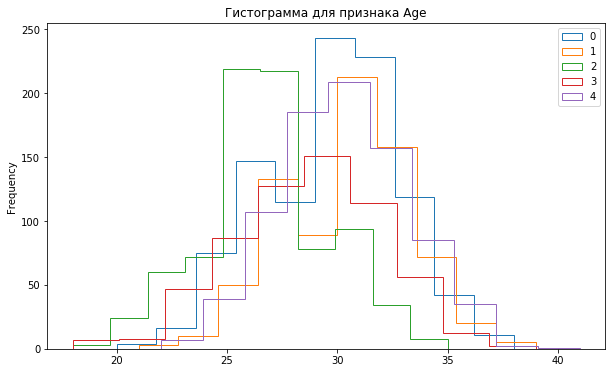

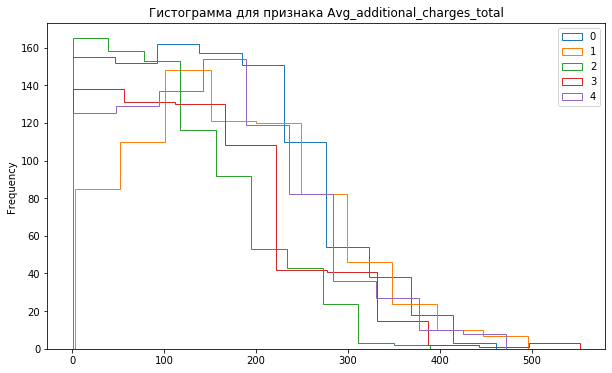

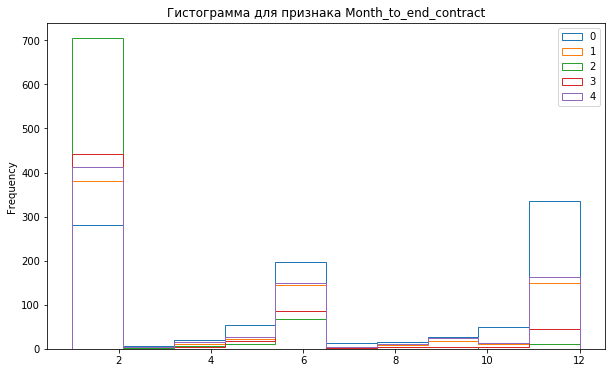

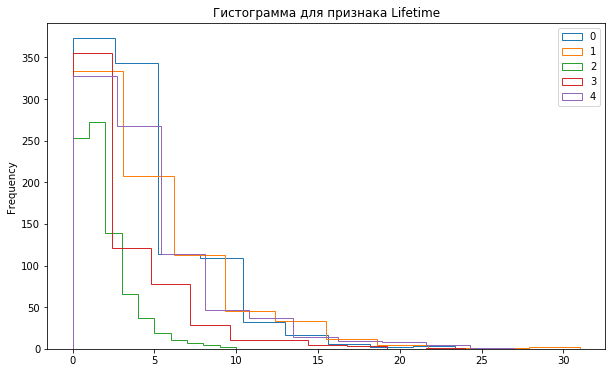

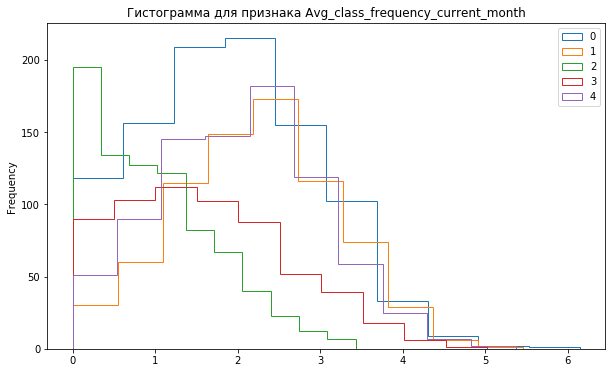

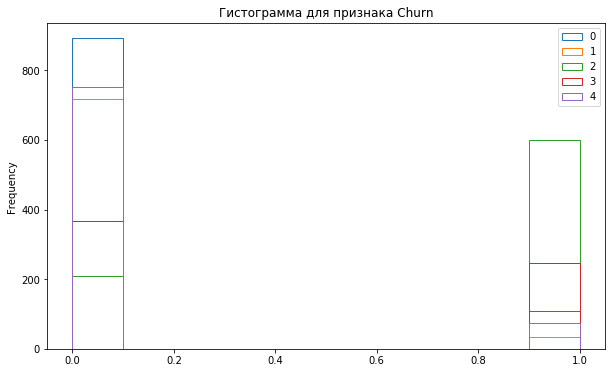

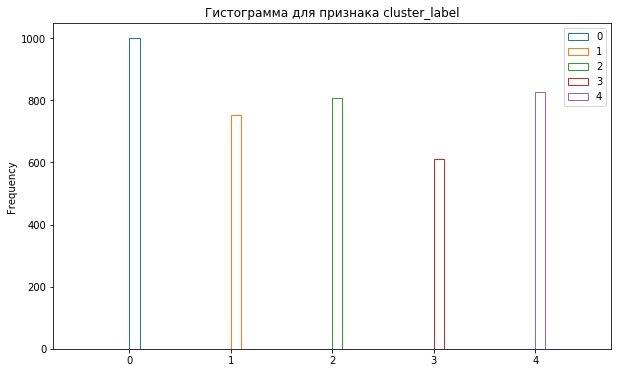

In [55]:
for column in df:
    plt.figure(figsize = (10,6))
    df.groupby('cluster_label')[column].plot(kind='hist', 
                                             alpha=1, 
                                             histtype = 'step', 
                                             title='Гистограмма для признака '+ str(column), 
                                             legend = True)
    plt.show()

По распределениям можно составить приблизительный портрет клиентов. К примеру, клиент самого "прогуливающего" кластера 3: молодой человек 25-30, зачастую приходящий в одиночестве занимается всего 1-2 месяца на которые и берет абонемент с соответствующей длительностью. Видимо пытается набрать форму к лету, но походив пару занятий бросает это дело.

Так как столбец `churn` по сути своей представляет собой булевые значения, то долю оттока можно вычислить простым взятием среднего (делал это чуть ранее в общей таблице, но выведу отдельно)

## **<font color="blue">UPD</font>** 

In [56]:
# Формирую списки для дискретных и непрерывных переменных
log_discr_features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']

cont_features = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_current_month']

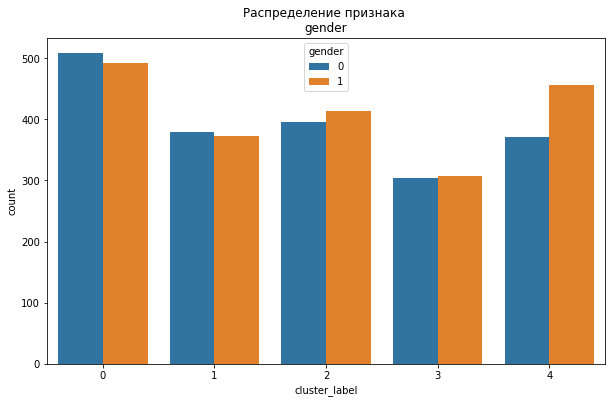

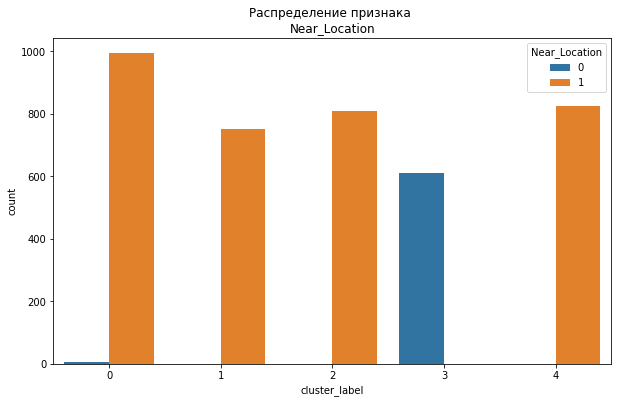

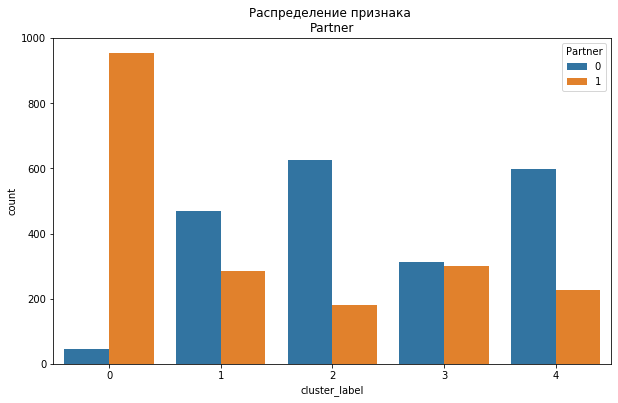

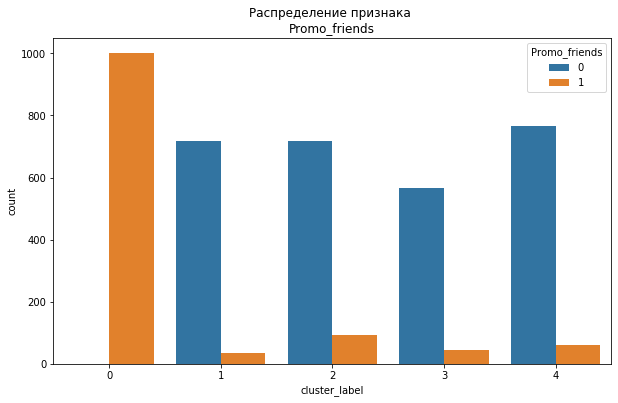

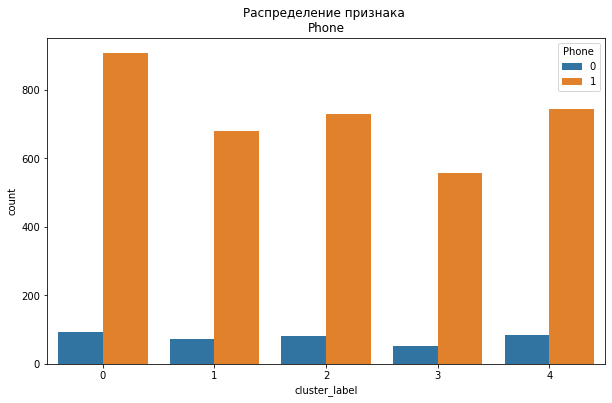

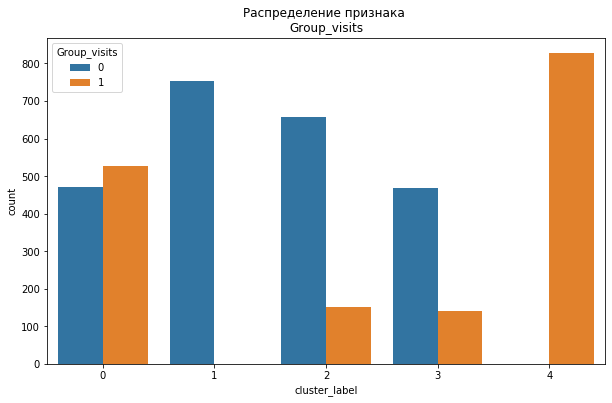

In [57]:
# Отрисовываем графики дискретных и булевых переменных
for column in log_discr_features:
    plt.figure(figsize = (10,6))
    sns.countplot(x = 'cluster_label', hue = column, data = df)
    plt.title('Распределение признака \n'+ str(column))
    plt.show()

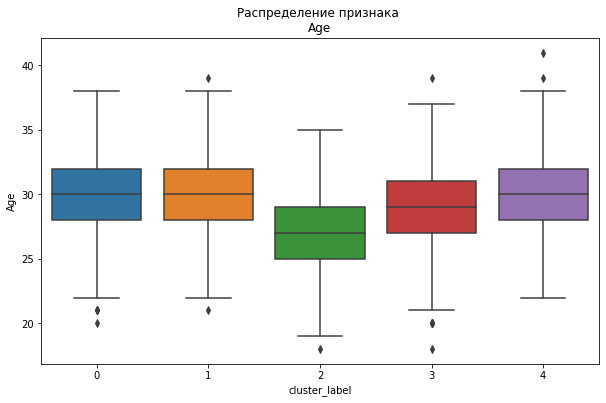

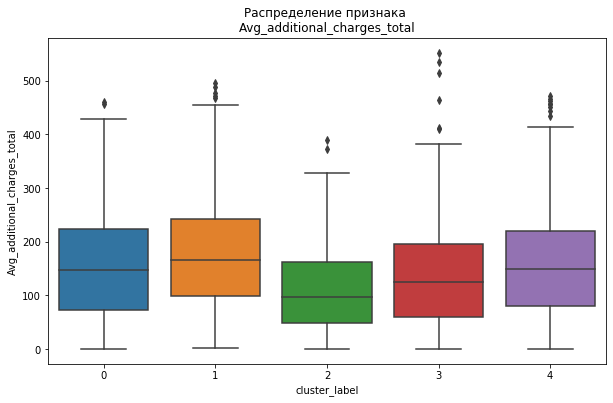

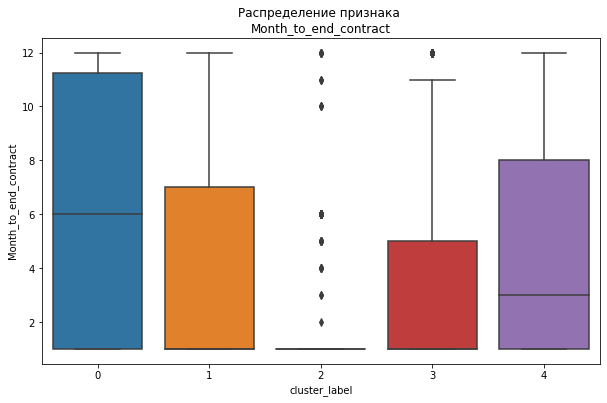

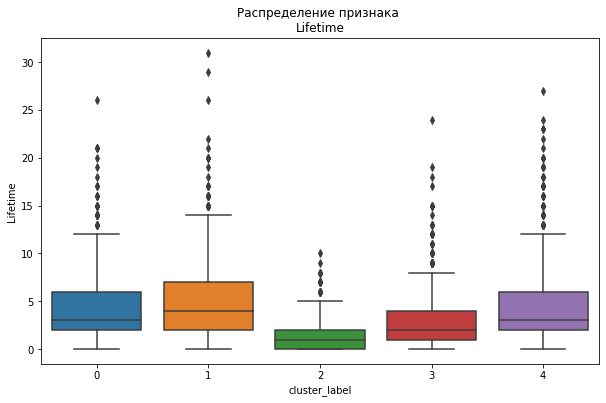

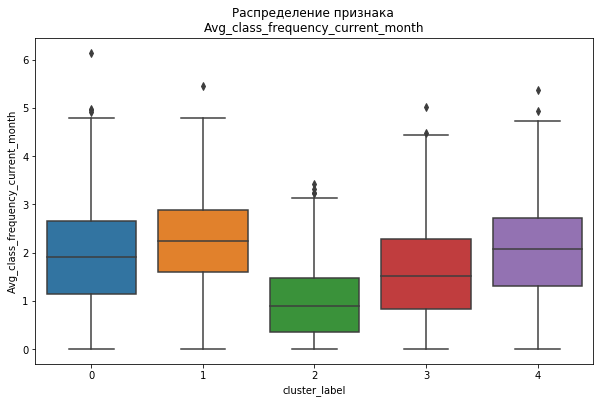

In [58]:
for column in cont_features:
    plt.figure(figsize = (10,6))
    sns.boxplot(y = column, x = 'cluster_label', data = df)
    plt.title('Распределение признака \n'+ str(column))
    plt.show()

По распределениям становится ясно как проходила кластеризация. На каждый кластер на том или ином графике идёт сильный перекос значений. Видимо таким образом алгоритм и расставляет кластеры клиентам.

**Кластер 0** представляет собой большую груупу работников-друзей из партнера-компании неподалёку или живущих рядом с фитнес-залом. Возраст 27-32 года, приносящие дополнительную выручку от 80 до 220 д.е. Зачастую берут долгосрочный абонемент и посещают зал 1-3 раза в неделю в среднем., и в половине случаев ходят на групповые занятия.

**Кластер 1** мне кажутся пауэрлифтерами: много качаются, не скупятся на дополнительные услуги, абсолютно не ходят на групповые занятия. Живут или работают рядом с залом. Средний возраст 27-32 года. Относительно остальных кластеров приносят наибольшую прибыль: 100-250 д.е. Дольше остальных посещают зал - в среднем 4 месяца. И чаще остальных - зачастую 2 раза в неделю.

**Кластер 2** типичный портрет молодого прогульщика. Почти не приходит по акции, редко является работником компании-партнера клуба, но живет неподалеку. Редко посещает групповые занятия. Самый молодой кластер - 25-29 лет. Меньше всех остальных тратится на доп услуги. Практически всегда покупает абонемент на 1 месяц и меньше всех остальных посещает зал - 1 раз в среднем за неделю.

**Кластер 3** вместил в себя всех клиентов клуба не живущих рядом. Это основное отличие. Все остальные показатели ниже остальных(кроме кластера 2)

**Кластер 4** объединил в себе клиентов посещающих только групповые занятия. Есть легкий перевес в сторону одного пола, которого не было видно у остальных кластеров. Живут или работают рядом, изредка являются сотрудниками компании-партнера. Средний возраст 28-32 года. Приносят хорошую суммарную выручку 90-210 д.е. Зачастую являются владельцами длительного абонемента. Посещают клуб 2 раза в неделю в среднем.

In [59]:
df.groupby(by = 'cluster_label')['Churn'].mean()

cluster_label
0    0.108000
1    0.046481
2    0.740420
3    0.400982
4    0.089480
Name: Churn, dtype: float64

Самая большие доли оттока у кластеров 3 и 2: 51,4% и 44,4% соответственно

Самые маленькие у кластеров 0 и 4: 2,8% и 6,8% соответственно.

**<font color="blue">После правок</font>** 

Самая большие доли оттока у кластеров 2 и 3: 74,0% и 40,1% соответственно

Самые маленькие у кластеров 1 и 4: 4,6% и 8,9% соответственно.

## Шаг 5. Общие выводы и рекомендации по работе с клиентами



В рамках данного проекта были представлены данные от сети фитнес-центров «Культурист-датасаентист» с данными пользователей. Были проведены следующие действия:

1. Проведен исследовательский анализ данных

    Даны следующие выводы:
    
      - Проживающие или работающие в районе, где находится фитнес-центр меньше уходят в отток, нежели остальные.
      - Сотрудники компании-партнёра клуба и пришедшие в рамках акции "приведи друга" также реже уходят в отток.
      
   По столбчатым гистограммам, распределениям и матрице корреляций были сформулированы соответствующие выводы.
   
   
2. Была построена модель прогнозирования оттока пользователей.

    Модель была обучена 2 способами:
      - логистической регрессией
      - случайным лесом
      
   Они были сравнены по значениям посчитанных метрик. Модель построенная на алгоритме логистической регрессии показала себя лучше.
   
   
3. Проведена кластеризация пользователей

    Данные были разделены на 5 кластеров. 
    
    **Лучшим** кластером был принят кластер 1. Доля оттока составила - 4,6%.
    
    **Худшим** - кластер 2. Доля оттока - 74,0%. 
    
Были даны описания типичного портрета клиента из каждого кластера.
    

## Рекомендации по работе с клиентами

### 1. Больше и чаще проводить акции.

По представленным данным видно, что клиенты, пришедшие  в рамках акции "Приведи друга" гораздо меньше уходят в отток. Следует разнообразить количество акций. Это также подтолкнёт к увеличению количества клиентов.

### 2. Увеличение количества клиентов с длительными абонементами

Клиенты покупающие абонементы на год очень редко уходят в отток и с них добывается хорошая выручка. Покупкуможно спровоцировать уменьшением цен на длительные абонементы.

### 3. Привлечение клиентов проживающих/работающих недалеко от фитнес-центра.

Данные клиенты также меньше уходят в отток. Их можно привлечь рекламой развешенной в определённом радиусе от зала. Таким образом, его увидят лишь люди проходящие рядом с залом среди которых легко найдутся требуемые.